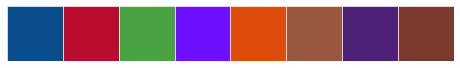

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("paper", font_scale=1.5)
flatui = ["#0a4d8c", "#ba0c2f", "#49a343", "#6E10FF", "#DE4C0B", "#99583D", "#4d2177", "#7c3a2d"]
# https://color.adobe.com/zh/create/color-wheel/?basfrom matplotlib import rc
sns.palplot(flatui)

In [2]:
!ls

Gibbs_errors_10_20_1000000.csv          errors_151020_20_100000.csv
Gibbs_potts.py                          errors_151020_20_500000.csv
MGPMH_errors_10_10_100000.csv           plott_potts.ipynb
MGPMH_errors_10_20_1000000.csv          potts.py
Marginals_50.pdf                        potts.py.lprof
T_0.1_Gibbs_errors_10_20_1000000.csv    potts_video.py
T_0.1_MGPMH_errors_10_20_1000000.csv    potts_video.py.lprof
VaryTemp_Gibbs_errors_10_20_1000000.csv run.sh
VaryTemp_MGPMH_errors_10_20_1000000.csv test.py
data


In [7]:
def iter_loadtxt(filename, delimiter=',', skiprows=0, dtype=float):
    def iter_func():
        with open(filename, 'r') as infile:
            for _ in range(skiprows):
                next(infile)
            for line in infile:
                line = line.rstrip().split(delimiter)
                for item in line:
                    yield dtype(item)
        iter_loadtxt.rowlength = len(line)

    data = np.fromiter(iter_func(), dtype=dtype)
    data = data.reshape((-1, iter_loadtxt.rowlength))
    return data

In [8]:
# error = np.genfromtxt('MGPMH_errors_10_20_1000000.csv',delimiter=',')

In [9]:
# gibbs_error = np.genfromtxt('Gibbs_errors_10_20_1000000.csv',delimiter=',')

In [20]:
error = iter_loadtxt('MGPMH_errors_10_20_1000000.csv')
gibbs_error = iter_loadtxt('Gibbs_errors_10_20_1000000.csv')

In [21]:
error = error[error[:,0].argsort()[::1]]

In [22]:
index = np.arange(100,1000000,100)

In [23]:
error[:,0]

array([   1.,   30.,   60.,   75.,  113.])

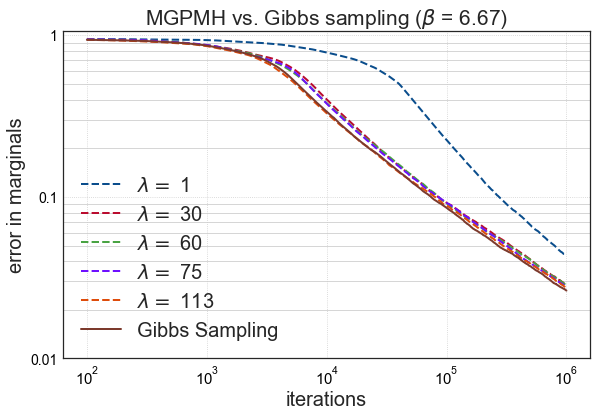

In [24]:
import matplotlib.lines as lines
with sns.axes_style("white"):
    fig = plt.figure(figsize=(8.5, 6))
    ax  = fig.add_subplot(111)
    plt.yscale('log')
    plt.xscale('log')

    for i in range(5):
        line = error[i,index]
        plt.plot(index,line,color=flatui[i],linestyle='--',linewidth=2,label="$\lambda = $ {:d}".format(int(error[i,0])))
    
    for i in range(1):
        line = gibbs_error[0,index]
        plt.plot(index,line,color=flatui[-1],linewidth=2,label="Gibbs Sampling".format(i))
    
    
    plt.ylim(0.01,1.07)
    plt.yticks((0.01, 0.1, 1), ('0.01', '0.1', '1'), color='k', size=14)
    plt.xticks(color='k',size=15)
    plt.grid(True, which="both",axis='y')
    plt.xlabel("iterations", size=20)
    plt.ylabel("error in marginals", size=20)
    plt.title(r'MGPMH vs. Gibbs sampling ($\beta$ = 6.67)',size=21)
    plt.legend(loc='lower left',fontsize=20)
    plt.grid(linestyle='dotted')
    plt.tight_layout(pad=1, w_pad=1, h_pad=1)
    
    plt.savefig("Marginals_{}.pdf".format('50'), bbox_inches='tight')
    plt.show()

In [2]:
t1 = np.genfromtxt('VaryTemp_MGPMH_errors_10_20_1000000.csv',delimiter=',')

In [3]:
t2 = np.genfromtxt('VaryTemp_Gibbs_errors_10_20_1000000.csv',delimiter=',')

In [27]:
.7/1.5**2

0.3111111111111111

In [1]:
1/6.67

0.14992503748125938

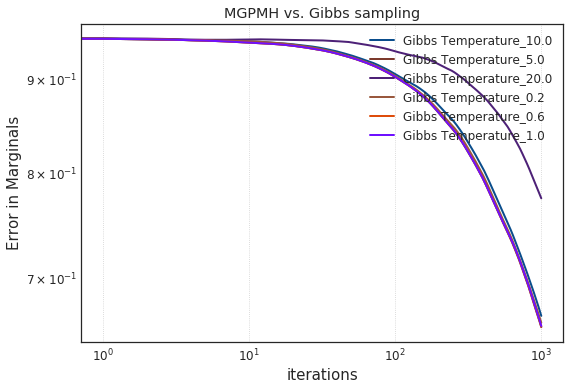

In [44]:
import matplotlib.lines as lines
with sns.axes_style("white"):
    fig = plt.figure(figsize=(8, 5.5))
    ax  = fig.add_subplot(111)
    plt.yscale('log')
    plt.xscale('log')
#     for i in range(6):
#         line = t1[i,1:1000]
#         plt.plot(line,color=flatui[i],linewidth=2,label="Temperature_{}".format(t1[i,0]))

    for i in range(6):
        line = t2[i,1:1000]
        plt.plot(line,color=flatui[-i],linewidth=2,label="Gibbs Temperature_{}".format(t1[i,0]))
    plt.xlabel("iterations", size=15)
    plt.ylabel("Error in Marginals", size=15)
    plt.title('MGPMH vs. Gibbs sampling')
    plt.legend(loc='upper right')
    plt.grid(linestyle='dotted')
    plt.tight_layout(pad=1, w_pad=1, h_pad=1)

    plt.savefig("Marginals_{}.pdf".format('50'), bbox_inches='tight')
    plt.show()